In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
import calendar
import numpy as np
from tslearn.metrics import dtw as ts_dtw  # Import DTW from tslearn
from fastdtw import fastdtw  # Import fastDTW from fastdtw
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
from sklearn.cross_decomposition import PLSRegression

# Define initial parameters
initial_start_date = pd.to_datetime('1967-07-01')
initial_training_years = 10

# Define factors
factors = [
    'r_size', 'r_value', 'r_prof', 'r_valprof', 'r_fscore',
    'r_debtiss', 'r_repurch', 'r_nissa', 'r_accruals', 'r_growth', 'r_aturnover',
    'r_gmargins', 'r_divp', 'r_ep', 'r_cfp', 'r_noa', 'r_inv', 'r_invcap',
    'r_igrowth', 'r_sgrowth', 'r_lev', 'r_roaa', 'r_roea', 'r_sp', 'r_gltnoa',
    'r_indmom', 'r_valmom', 'r_valmomprof', 'r_shortint', 'r_mom12', 'r_momrev',
    'r_lrrev', 'r_valuem', 'r_nissm', 'r_sue', 'r_roe', 'r_rome', 'r_roa',
    'r_strev', 'r_ivol', 'r_betaarb', 'r_season', 'r_indrrev', 'r_indrrevlv',
    'r_indmomrev', 'r_ciss', 'r_price', 'r_age', 'r_shvol'
]

# Create an empty list for monthly PLS returns
pls_return_data = []

# Initialize an empty list to store PLS weights
pls_weights_list = []

# Loop through years and months
for year in range(1973, 1975):
    for month in range(6, 13) if year == 1973 else range(1, 13):

        # Define start and end dates
        last_day = calendar.monthrange(year, month)[1]
        end_date = pd.to_datetime(f'{year}-{month}-{last_day}')

        # For the expanding window, start date becomes initial start date
        start_date = initial_start_date

        # Select data range for PLS analysis
        pls_data = r_daily.loc[start_date:end_date]

        # Separate features (X) and target (y)
        X = pls_data[factors]
        y = pls_data['r_mom12']

        # Fit PLS model
        pls = PLSRegression(n_components=44)  # Adjust number of components as needed
        pls.fit(X, y)

        # Calculate predicted values
        predictions = pls.predict(X)

        # Extract and store PLS weights
        pls_weights = pd.DataFrame(pls.x_weights_, index=factors, columns=[f"PLS{i+1}" for i in range(pls.x_weights_.shape[1])])
        pls_weights_list.append(pls_weights)

        # Append the monthly PLS returns to the list
        pls_return_data.append({'date': end_date, **{f"PLS{f+1}": predictions[f] for f in range(len(factors))}})

# Convert the list of dictionaries to a DataFrame
pls_return_df = pd.DataFrame(pls_return_data)


# Print the resulting dataframe
print("PLS Returns:")
print(pls_return_df)

# Print PLS weights
for i, weights in enumerate(pls_weights_list, start=1):
    print(f"PLS Weights for month {i}:")
    print(weights)


In [3]:
#Dit is voor de algehele tijdspan


url = 'https://raw.githubusercontent.com/Sebasleen/Seminargroup/Seminar/managed_portfolios_anom_d_50.csv'
df = pd.read_csv(url)

#drop the rme & re_ew columns
df.drop(columns=['rme', 're_ew'], inplace=True)

#Store the date column to readd later
dates_column = df['date']

# Drop the "date" column from the DataFrame
df.drop(columns=['date'], inplace=True)

# Replace NaN values with 0
df.fillna(0, inplace=True)

# Select only the columns containing numerical data
numerical_columns = df.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Re-add the "date" column to the DataFrame
df['date'] = dates_column

# Now, df contains scaled numerical data with the specified columns dropped and the "date" column re-added
print(df)

# Calculate z-scores for each numerical column
z_scores = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()

# Define a threshold for outlier detection (e.g., 3 or -3)
threshold = 3

# Identify outliers based on z-scores
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Print the rows containing outliers
print("Rows with potential outliers:")
print(df[outliers.any(axis=1)])
#
## Perform K-means clustering
#kmeans = KMeans(n_clusters=7, random_state=42)  # Adjust the number of clusters as needed
#clusters = kmeans.fit_predict(X_scaled)
#
## Add cluster labels to the DataFrame
#df['Cluster'] = clusters
#
## Plot clusters for the first two principal components (for visualization purposes)
#plt.figure(figsize=(8, 6))
#for cluster in sorted(df['Cluster'].unique()):
#    cluster_points = X_scaled[clusters == cluster]
#    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
#
#plt.title('K-means Clustering')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.legend()
#plt.show()
#
## Print cluster centers (centroid)
#print("Cluster Centers:")
#print(pd.DataFrame(kmeans.cluster_centers_, columns=factors))
#
## Print cluster sizes
#print("Cluster Sizes:")
#print(df['Cluster'].value_counts())


         r_size   r_value    r_prof  r_valprof  r_fscore  r_debtiss  \
0      0.076486  0.023008  0.454666   0.225538 -0.392670  -0.004996   
1      0.066029 -0.315550  0.862036   0.158780 -0.207106  -0.004996   
2     -0.008066 -0.144767  0.710404   0.551203  0.133047  -0.004996   
3      0.679741 -0.315771 -0.693114  -0.926206  0.879686  -0.004996   
4     -0.336249  0.330552  0.119246   0.239538 -1.292301  -0.004996   
...         ...       ...       ...        ...       ...        ...   
13714  0.010236  0.160122 -0.167471   0.200234 -0.370632   0.166741   
13715 -0.135746 -0.034072  0.444317   0.412213 -0.676394   0.257063   
13716  0.057643 -0.438445  0.251517  -0.390031  0.121045   0.433827   
13717 -0.150469  0.224346 -0.697869  -0.209917 -0.349258  -0.083990   
13718  0.373120  0.063045 -0.076882  -0.252004  0.075554  -0.900423   

       r_repurch   r_nissa  r_accruals  r_growth  ...  r_betaarb  r_season  \
0      -0.026409  0.554885    0.449014  0.096185  ...   0.004475  0.1

In [ ]:
print(df)

In [5]:
# Convert the 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index of the DataFrame
df.set_index('date', inplace=True)

# Resample the DataFrame to a monthly frequency
df = df.resample('M').mean()  # Resample to monthly frequency and calculate mean

# Interpolate missing values to fill gaps (e.g., forward fill, backward fill, or interpolate)
df.interpolate(method='linear', inplace=True)  # Linear interpolation for filling missing values


              r_size   r_value    r_prof  r_valprof  r_fscore  r_debtiss  \
date                                                                       
1963-07-31  0.092984 -0.045323 -0.010132  -0.061829  0.162027  -0.004996   
1963-08-31  0.056969 -0.024446  0.169307   0.092925  0.040991  -0.004996   
1963-09-30  0.011216  0.065497 -0.060397  -0.007465 -0.021448  -0.004996   
1963-10-31  0.031552  0.059600  0.213067   0.204862  0.179569  -0.004996   
1963-11-30  0.151172  0.031128 -0.107781  -0.134978  0.037074  -0.004996   
...              ...       ...       ...        ...       ...        ...   
2017-08-31  0.125781 -0.162918  0.147269  -0.167978 -0.050332   0.206492   
2017-09-30 -0.176243  0.087161 -0.229402  -0.110482 -0.306360   0.000803   
2017-10-31 -0.011887 -0.078741  0.069450  -0.092598  0.196603   0.130654   
2017-11-30  0.055471 -0.094030  0.195749   0.202021  0.055684   0.071337   
2017-12-31  0.062676 -0.034943  0.013743  -0.036912 -0.337778   0.069759   

           

In [7]:
#Dit runnen kost ongeveer 15 minuten dus doe maar niet te vaak

from joblib import Parallel, delayed
import sys

# Define a function to compute DTW distance between a pair of time series
def compute_dtw_distance(series1, series2):
    dtw_dist, _ = fastdtw(series1, series2)  # Compute DTW distance
    return dtw_dist

# Function to compute DTW distances in parallel with progress tracking
def compute_dtw_distances_parallel(df_resampled):
    # Initialize distance matrix
    dtw_distances = np.zeros((len(df_resampled), len(df_resampled)))
    
    # Define the number of parallel jobs (adjust as needed)
    num_jobs = -1  # Use all available CPU cores
    
    # Compute DTW distances in parallel
    total_pairs = len(df_resampled) * len(df_resampled)
    progress_step = total_pairs // 1000  # Update progress every 0.1%
    progress_count = 0
    
    print("Computing DTW distances:")
    
    for i in range(len(df_resampled)):
        for j in range(len(df_resampled)):
            # Compute DTW distance between the ith and jth time series
            dtw_dist, _ = fastdtw(df_resampled.iloc[i], df_resampled.iloc[j])  # Use fastDTW for efficiency
            dtw_distances[i, j] = dtw_dist
            
            # Print progress at regular intervals
            progress_count += 1
            if progress_count % progress_step == 0:
                progress = progress_count / total_pairs * 100
                sys.stdout.write("\rProgress: {:.1f}%".format(progress))
                sys.stdout.flush()
    
    # Reshape the results into a matrix
    dtw_distances = np.array(dtw_distances).reshape(len(df_resampled), len(df_resampled))
    
    return dtw_distances

# Calculate DTW distances between pairs of time series in parallel with progress tracking
dtw_distances = compute_dtw_distances_parallel(df)

# Print a newline after completion
print()

# Print the DTW distances matrix
print("DTW Distances Matrix:")
print(dtw_distances)

# Print the shape of the DTW distances matrix
print("Shape of DTW Distances Matrix:")
print(dtw_distances.shape)

# Calculate average DTW distance across all pairs
avg_dtw_distance = np.mean(dtw_distances)
print("Average DTW Distance:", avg_dtw_distance)

Computing DTW distances:
Progress: 99.9%
DTW Distances Matrix:
[[0.         2.14434221 2.81928387 ... 4.00862482 4.15664788 4.75262003]
 [2.14434221 0.         3.37004737 ... 4.23094999 4.76106289 4.72580765]
 [2.81928387 3.37004737 0.         ... 4.58142419 4.64384702 5.02129907]
 ...
 [4.00862482 4.23094999 4.58142419 ... 0.         4.8070892  5.35828779]
 [4.15664788 4.76106289 4.64384702 ... 4.8070892  0.         5.08028778]
 [4.75262003 4.72580765 5.02129907 ... 5.35828779 5.08028778 0.        ]]
Shape of DTW Distances Matrix:
(654, 654)
Average DTW Distance: 9.649543358914569


In [75]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Perform spectral clustering
spectral_clustering = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42)
labels = spectral_clustering.fit_predict(dtw_distances)

# Calculate silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(dtw_distances, labels)
print("Silhouette Score:", silhouette_avg)

# Visualize clustering results (optional)
# Implement visualization based on your preference or requirements



Silhouette Score: -0.03325106646544263


/Users/sebasleen/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


In [89]:
from sklearn.cluster import KMeans

# Flatten the distance matrix into a vector
dtw_distances_flat = dtw_distances.flatten()

# Perform K-means clustering with precomputed distances
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10)
labels = kmeans.fit_predict(dtw_distances_flat.reshape(-1, 1))

# Print cluster labels
print(labels)


[0 0 0 ... 0 0 0]


In [159]:
from sklearn.cluster import AgglomerativeClustering

# Initialize Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=50)

# Fit the model to the DTW distances matrix and predict clusters
agg_labels = agg_clustering.fit_predict(dtw_distances)

# Print cluster labels
print("Cluster Labels:")
print(agg_labels)

# Print the number of clusters
n_clusters_agg = len(set(agg_labels))
print("Estimated number of clusters:", n_clusters_agg)



# Assuming df contains your original data with each row representing a data point

# Create a DataFrame to store cluster profiles
cluster_profiles = pd.DataFrame(columns=range(n_clusters_agg), index=df.columns)

# Iterate over unique cluster labels
for cluster_label in range(n_clusters_agg):
    # Select data points belonging to the current cluster
    cluster_data = df[agg_labels == cluster_label]
    
    # Compute summary statistics (e.g., mean) for each feature within the cluster
    cluster_summary = cluster_data.mean()  # You can use other functions like median, std, etc.
    
    # Assign the cluster summary to the corresponding column in the cluster profiles DataFrame
    cluster_profiles[cluster_label] = cluster_summary

# Transpose the cluster profiles DataFrame for better readability
cluster_profiles = cluster_profiles.T

# Print cluster profiles
print("Cluster Profiles:")
print(cluster_profiles)



Cluster Labels:
[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10  3 10  3  3 10 10 38 10 10 10 10  5  1 10  5 10 10 10 10  3
 10 10 10 10 10 10  5  3 10 18 10  5  5 10 10 10 10 10 10 10 10 10 10 10
 10 36 10 10 10 10  3  3  3  9  3 10 10 10  1 10 10 10  3 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10  3 10 10 10  3  3  3 10 14 10 10
 32 10  3 10 17 14  2 10 10 10 10  3  6 10 17 39 10 10  4 18  5 10 10 10
 10 10 10 10 10 10 36 36 10 10 10 10 10 10 10 10 10 10  3 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 30 36 10 10 10 10 10 10 10
 10 10 10 10 36 10 10 10  2  3 10 10  6 10 36 10 27  3 41 10 10 10 10 14
  3 10  3 36 10 10  3  9 10 10 10 10 10 10 10  3 36 10  3 10 10 10 10 10
  3 10 10 14 10 10 14 10 10 10 10 10 10  3  5 10 10 10  5 10  3  3 10 10
 10 10 10 10 10 10 10 10 10 10 10 10  5 38  3 10 10 10 10 36 10 10 10 10
 10 10 10 40 10 18  5 36 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 1

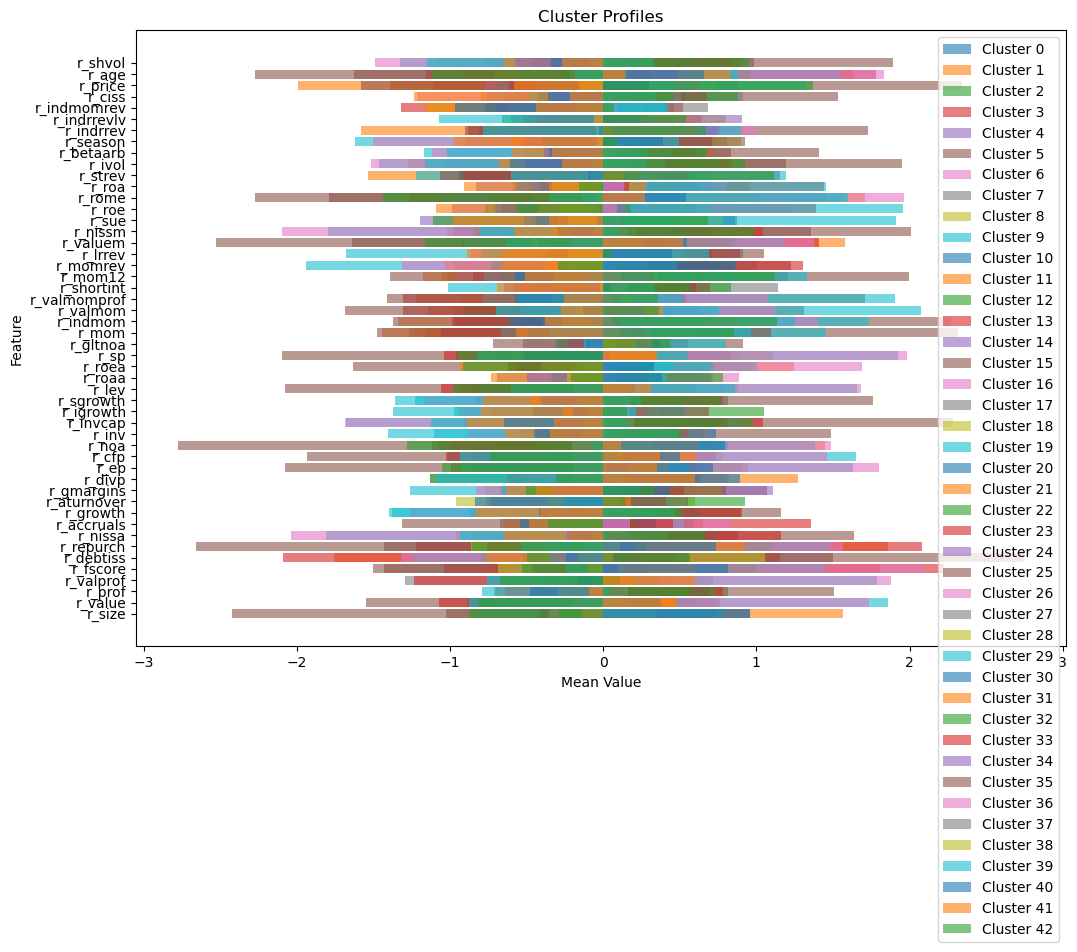

In [165]:
# Plotting cluster profiles as bar plots
plt.figure(figsize=(12, 8))

# Iterate over each cluster
for cluster_label in range(n_clusters_agg):
    # Select data points belonging to the current cluster
    cluster_data = df[agg_labels == cluster_label]
    
    # Compute the mean value of each feature within the cluster
    cluster_means = cluster_data.mean()
    
    # Plot the bar plot for the current cluster
    plt.barh(cluster_means.index, cluster_means.values, label=f'Cluster {cluster_label}', alpha=0.6)

plt.xlabel('Mean Value')
plt.ylabel('Feature')
plt.title('Cluster Profiles')
plt.legend()
plt.show()


In [ ]:
#Dit is yearly

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read data from URL
url = 'https://raw.githubusercontent.com/Sebasleen/Seminargroup/Seminar/managed_portfolios_anom_d_50.csv'
df = pd.read_csv(url)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Replace missing values with 0
df.fillna(0, inplace=True)

# Define relevant factors
factors = [
    'r_size', 'r_value', 'r_prof', 'r_valprof', 'r_fscore',
    'r_debtiss', 'r_repurch', 'r_nissa', 'r_accruals', 'r_growth', 'r_aturnover',
    'r_gmargins', 'r_divp', 'r_ep', 'r_cfp', 'r_noa', 'r_inv', 'r_invcap',
    'r_igrowth', 'r_sgrowth', 'r_lev', 'r_roaa', 'r_roea', 'r_sp', 'r_gltnoa',
    'r_indmom', 'r_valmom', 'r_valmomprof', 'r_shortint', 'r_mom12', 'r_momrev',
    'r_lrrev', 'r_valuem', 'r_nissm', 'r_sue', 'r_roe', 'r_rome', 'r_roa',
    'r_strev', 'r_ivol', 'r_betaarb', 'r_season', 'r_indrrev', 'r_indrrevlv',
    'r_indmomrev', 'r_ciss', 'r_price', 'r_age', 'r_shvol'
]

# Initialize a list to store the cluster centers
cluster_centers_list = []

# Initialize a dictionary to store the cluster sizes
cluster_sizes_dict = {}

# Set the starting date
start_date = pd.to_datetime('1973-07-31')

# Iterate over each year
for year, year_data in df.groupby(df.index.year):
    # Skip years before the starting date
    if year < start_date.year:
        continue

    # Extract relevant features for the current year
    X = year_data[factors]

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=7, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Store cluster centers
    cluster_centers_list.append(kmeans.cluster_centers_)

    # Store cluster sizes
    cluster_sizes_dict[year] = pd.Series(clusters).value_counts()

    # Plot clusters for the first two principal components
    plt.figure(figsize=(8, 6))
    for cluster in range(7):
        cluster_points = X_scaled[clusters == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

    plt.title(f'K-means Clustering for Year {year}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Print cluster centers for each year
for i, centers in enumerate(cluster_centers_list, start=start_date.year):
    print(f"Cluster Centers for Year {i}:")
    print(pd.DataFrame(centers, columns=factors))

# Print cluster sizes for each year
for year, sizes in cluster_sizes_dict.items():
    print(f"Cluster Sizes for Year {year}:")
    print(sizes)


In [ ]:
#Dit is met Hierarchial Clustering
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read data from URL
url = 'https://raw.githubusercontent.com/Sebasleen/Seminargroup/Seminar/managed_portfolios_anom_d_50.csv'
df = pd.read_csv(url)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Replace missing values with 0
df.fillna(0, inplace=True)

# Define relevant factors
factors = [
    'r_size', 'r_value', 'r_prof', 'r_valprof', 'r_fscore',
    'r_debtiss', 'r_repurch', 'r_nissa', 'r_accruals', 'r_growth', 'r_aturnover',
    'r_gmargins', 'r_divp', 'r_ep', 'r_cfp', 'r_noa', 'r_inv', 'r_invcap',
    'r_igrowth', 'r_sgrowth', 'r_lev', 'r_roaa', 'r_roea', 'r_sp', 'r_gltnoa',
    'r_indmom', 'r_valmom', 'r_valmomprof', 'r_shortint', 'r_mom12', 'r_momrev',
    'r_lrrev', 'r_valuem', 'r_nissm', 'r_sue', 'r_roe', 'r_rome', 'r_roa',
    'r_strev', 'r_ivol', 'r_betaarb', 'r_season', 'r_indrrev', 'r_indrrevlv',
    'r_indmomrev', 'r_ciss', 'r_price', 'r_age', 'r_shvol'
]

# Initialize a list to store the cluster sizes
cluster_sizes_dict = {}

# Set the starting date
start_date = pd.to_datetime('1973-07-31')

# Iterate over each year
for year, year_data in df.groupby(df.index.year):
    # Skip years before the starting date
    if year < start_date.year:
        continue

    # Extract relevant features for the current year
    X = year_data[factors]

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform Hierarchical Agglomerative Clustering
    hac = AgglomerativeClustering(n_clusters=5)  # Adjust the number of clusters as needed
    clusters = hac.fit_predict(X_scaled)

    # Store cluster sizes
    cluster_sizes_dict[year] = pd.Series(clusters).value_counts()

    # Plot clusters for the first two principal components
    plt.figure(figsize=(8, 6))
    for cluster in range(5):  # Adjust the number of clusters as needed
        cluster_points = X_scaled[clusters == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

    plt.title(f'Hierarchical Agglomerative Clustering for Year {year}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Print cluster sizes for each year
for year, sizes in cluster_sizes_dict.items():
    print(f"Cluster Sizes for Year {year}:")
    print(sizes)




In [ ]:
#Dit is voor beide Hierarchial Agglomerative Clustering and K-Means

import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read data from URL
url = 'https://raw.githubusercontent.com/Sebasleen/Seminargroup/Seminar/managed_portfolios_anom_d_50.csv'
df = pd.read_csv(url)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Replace missing values with 0
df.fillna(0, inplace=True)

# Define relevant factors
factors = [
    'r_size', 'r_value', 'r_prof', 'r_valprof', 'r_fscore',
    'r_debtiss', 'r_repurch', 'r_nissa', 'r_accruals', 'r_growth', 'r_aturnover',
    'r_gmargins', 'r_divp', 'r_ep', 'r_cfp', 'r_noa', 'r_inv', 'r_invcap',
    'r_igrowth', 'r_sgrowth', 'r_lev', 'r_roaa', 'r_roea', 'r_sp', 'r_gltnoa',
    'r_indmom', 'r_valmom', 'r_valmomprof', 'r_shortint', 'r_mom12', 'r_momrev',
    'r_lrrev', 'r_valuem', 'r_nissm', 'r_sue', 'r_roe', 'r_rome', 'r_roa',
    'r_strev', 'r_ivol', 'r_betaarb', 'r_season', 'r_indrrev', 'r_indrrevlv',
    'r_indmomrev', 'r_ciss', 'r_price', 'r_age', 'r_shvol'
]

# Set the starting date
start_date = pd.to_datetime('1973-07-31')

# Initialize subplots
fig, axs = plt.subplots(len(df.index.year.unique()), 3, figsize=(18, len(df.index.year.unique()) * 6))

# Iterate over each year
for i, (year, year_data) in enumerate(df.groupby(df.index.year)):
    # Skip years before the starting date
    if year < start_date.year:
        continue

    # Extract relevant features for the current year
    X = year_data[factors]

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=10, random_state=42)
    kmeans_clusters = kmeans.fit_predict(X_scaled)

    # Perform Hierarchical Agglomerative Clustering
    hac = AgglomerativeClustering(n_clusters=10)  # Adjust the number of clusters as needed
    hac_clusters = hac.fit_predict(X_scaled)

    # Plot clusters for K-means
    axs[i, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_clusters, cmap='inferno', alpha=0.5)
    axs[i, 0].set_title(f'K-means Clustering for Year {year}')
    axs[i, 0].set_xlabel('Principal Component 1')
    axs[i, 0].set_ylabel('Principal Component 2')

    # Plot clusters for HAC
    axs[i, 1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=hac_clusters, cmap='spring', alpha=0.5)
    axs[i, 1].set_title(f'Hierarchical Agglomerative Clustering for Year {year}')
    axs[i, 1].set_xlabel('Principal Component 1')
    axs[i, 1].set_ylabel('Principal Component 2')

    # Plot differences
    kmeans_labels = pd.Series(kmeans_clusters, name='K-means')
    hac_labels = pd.Series(hac_clusters, name='HAC')
    comparison = pd.concat([kmeans_labels, hac_labels], axis=1)
    comparison['Difference'] = comparison['K-means'] - comparison['HAC']
    axs[i, 2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=comparison['Difference'], cmap='coolwarm', alpha=0.5)
    axs[i, 2].set_title(f'Differences between K-means and HAC for Year {year}')
    axs[i, 2].set_xlabel('Principal Component 1')
    axs[i, 2].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [ ]:
file_url = 'https://raw.githubusercontent.com/Sebasleen/Seminargroup/Seminar/US%20Factors/anomalies.dta'

# Read the Stata file content
Anomalies = pd.read_stata(file_url)

# Display unique values in the 'anomaly' column
print(Anomalies['anomaly'].unique())

#Hier heb ik de global factors verwijderd
column_name = 'anomaly'
values_to_dropUS = ['glbab', 'glcma', 'glhml', 'glqmj', 'glrmw', 'glsmb', 'glumd']
ElementsUS = Anomalies[column_name].isin(values_to_dropUS)
Anomalies_US = Anomalies[~ElementsUS]

column_name = 'anomaly'
values_to_dropGF = ['ac', 'bab', 'cfp', 'cma', 'ep', 'hml', 'liq', 'ltrev', 'nsi', 'qmj', 'rmw', 'rvar',
'smb', 'strev', 'umd']
ElementsGF = Anomalies[column_name].isin(values_to_dropGF)
Anomalies_GF = Anomalies[~ElementsGF]

#Dit zijn dus alle 15 factors die alleen bij de US horen. 
print(Anomalies_US)

#En dit zijn alle 7 global factors
print(Anomalies_GF)

# Convert 'year' and 'month' columns to datetime for US factors
Anomalies_US = Anomalies_US.copy()
Anomalies_US['date'] = pd.to_datetime(Anomalies_US['year'].astype(str) + '-' + Anomalies_US['month'].astype(str).str.zfill(2))
Anomalies_US = Anomalies_US.drop(columns=['year', 'month'])

# Convert 'year' and 'month' columns to datetime for Global factors
Anomalies_GF = Anomalies_GF.copy()
Anomalies_GF['date'] = pd.to_datetime(Anomalies_GF['year'].astype(str) + '-' + Anomalies_GF['month'].astype(str).str.zfill(2))
Anomalies_GF = Anomalies_GF.drop(columns=['year', 'month'])

# Define the desired column order
desired_columns_order = ["anomaly", "date", "ret", "time", "global"]

# Reorder the columns in the US factors DataFrame
Anomalies_US = Anomalies_US.reindex(columns=desired_columns_order)

# Reorder the columns in the Global factors DataFrame
Anomalies_GF = Anomalies_GF.reindex(columns=desired_columns_order)

Anomalies_US.drop(columns=['global'], inplace=True)
Anomalies_GF.drop(columns=['global'], inplace=True)


# Display the updated DataFrames
print("US Factors:")
print(Anomalies_US)

print("\nGlobal Factors:")
print(Anomalies_GF)


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming Anomalies_GF DataFrame is already loaded and preprocessed

# Convert 'date' column to ordinal numbers
Anomalies_US['date_ordinal'] = pd.to_datetime(Anomalies_US['date']).apply(lambda x: x.toordinal())

# Extract relevant numerical features for clustering
numerical_features = Anomalies_US[['date_ordinal', 'ret']]

# Exclude 'date_ordinal' from the numerical features to be standardized
numerical_features_for_scaling = Anomalies_US[['ret']]

# Standardize the numerical features (excluding 'date_ordinal')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features_for_scaling)

# Perform hierarchical clustering
n_clusters = 15  # Choose the number of clusters
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agglomerative_clustering.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
Anomalies_US['Cluster'] = clusters

# Display the DataFrame with cluster labels
print(Anomalies_US)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_points = Anomalies_US[clusters == cluster]
    plt.scatter(cluster_points['date_ordinal'], cluster_points['ret'], label=f'Cluster {cluster}')

plt.title('Clusters Visualization')
plt.xlabel('date_ordinal')
plt.ylabel('ret')
plt.legend()
plt.show()

# Print cluster statistics
for cluster in range(n_clusters):
    cluster_data = Anomalies_US[Anomalies_US['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data.describe())
    print("\n")


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Anomalies_GF DataFrame is already loaded and preprocessed

# Convert 'date' column to ordinal numbers
Anomalies_US['date_ordinal'] = pd.to_datetime(Anomalies_US['date']).apply(lambda x: x.toordinal())

# One-hot encode the 'anomaly' column
encoder = OneHotEncoder()
anomaly_encoded = encoder.fit_transform(Anomalies_US[['anomaly']])

# Combine one-hot encoded anomaly with numerical features
features = pd.concat([Anomalies_US[['date_ordinal', 'ret']], pd.DataFrame(anomaly_encoded.toarray(), columns=encoder.get_feature_names_out(['anomaly']))], axis=1)

# Exclude 'date_ordinal' from the numerical features to be standardized
numerical_features_for_scaling = Anomalies_US[['ret']]

# Standardize the numerical features (excluding 'date_ordinal')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features_for_scaling)

# Perform hierarchical clustering
n_clusters = 15  # Choose the number of clusters
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agglomerative_clustering.fit_predict(scaled_features)

# Determine the most common anomaly in each cluster
cluster_names = {}
for cluster in range(n_clusters):
    cluster_data = Anomalies_US[clusters == cluster]
    most_common_anomaly = cluster_data['anomaly'].value_counts().idxmax()
    cluster_names[cluster] = most_common_anomaly

# Add cluster names to the DataFrame
Anomalies_US['Cluster'] = [cluster_names[cluster] for cluster in clusters]

# Display the DataFrame with cluster labels
print(Anomalies_US)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in cluster_names.keys():
    cluster_points = Anomalies_US[clusters == cluster]
    plt.scatter(cluster_points['date_ordinal'], cluster_points['ret'], label=f'Cluster {cluster_names[cluster]}')

plt.title('Clusters Visualization')
plt.xlabel('date_ordinal')
plt.ylabel('ret')
plt.legend()
plt.show()


# Determine the anomalies present in each cluster
cluster_anomalies = {}
for cluster in range(n_clusters):
    cluster_data = Anomalies_US[clusters == cluster]
    cluster_anomalies[cluster] = cluster_data['anomaly'].unique()

# Display anomalies present in each cluster
for cluster, anomalies in cluster_anomalies.items():
    print(f"Cluster {cluster_names[cluster]}:")
    print(anomalies)
    print()

# Create boxplots for each feature within each cluster
plt.figure(figsize=(10, 5*len(features.columns)))

# Plot data distribution for each feature within each cluster
for i, feature in enumerate(features.columns):
    sns.boxplot(data=features, x=clusters, y=feature)
    plt.title(f'Data Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming Anomalies_GF DataFrame is already loaded and preprocessed

# Convert 'date' column to ordinal numbers
Anomalies_GF['date_ordinal'] = pd.to_datetime(Anomalies_GF['date']).apply(lambda x: x.toordinal())

# Extract relevant numerical features for clustering
numerical_features = Anomalies_GF[['date_ordinal', 'ret']]

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Perform hierarchical clustering
n_clusters = 7  # Choose the number of clusters
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agglomerative_clustering.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
Anomalies_GF['Cluster'] = clusters
# Add cluster names to the DataFrame
# Determine the most common anomaly in each cluster
cluster_names = {}
for cluster in range(n_clusters):
    cluster_data = Anomalies_GF[clusters == cluster]
    most_common_anomaly = cluster_data['anomaly'].value_counts().idxmax()
    cluster_names[cluster] = most_common_anomaly

Anomalies_GF['Cluster'] = [cluster_names[cluster] for cluster in clusters]

# Display the DataFrame with cluster labels
print(Anomalies_GF)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in cluster_names.keys():
    cluster_points = scaled_features[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_names[cluster]}')

plt.title('Clusters Visualization')
plt.xlabel('date_ordinal')
plt.ylabel('ret')
plt.legend()
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_points = numerical_features[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Clusters Visualization')
plt.xlabel('ret')
plt.ylabel('time')
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

# Load your dataset into a DataFrame (assuming it's already loaded)
# If not loaded, load it using pd.read_csv(), pd.read_excel(), or pd.read_stata() depending on the file format

# Assuming your DataFrame is named 'df'

# Perform agglomerative hierarchical clustering
# Specify the number of clusters you want
n_clusters = 3
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to your data
clusters = agglomerative_clustering.fit_predict(df)

# Plot dendrogram (optional but useful for visualizing hierarchy)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Using features from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
# Call the dendrogram function to plot the dendrogram
plot_dendrogram(agglomerative_clustering, labels=agglomerative_clustering.labels_)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Add the cluster labels to your DataFrame
df['Cluster'] = clusters


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Anomalies_GF DataFrame is already loaded and preprocessed

# Convert 'date' column to ordinal numbers
Anomalies_US['date_ordinal'] = pd.to_datetime(Anomalies_US['date']).apply(lambda x: x.toordinal())

# One-hot encode the 'anomaly' column
encoder = OneHotEncoder()
anomaly_encoded = encoder.fit_transform(Anomalies_US[['anomaly']])

# Combine one-hot encoded anomaly with numerical features
features = pd.concat([Anomalies_US[['date_ordinal', 'ret']], pd.DataFrame(anomaly_encoded.toarray(), columns=encoder.get_feature_names_out(['anomaly']))], axis=1)

# Exclude 'date_ordinal' from the numerical features to be standardized
numerical_features_for_scaling = Anomalies_US[['ret']]

# Standardize the numerical features (excluding 'date_ordinal')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features_for_scaling)

# Perform k-means clustering
n_clusters = 15  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(scaled_features)

# Determine the most common anomaly in each cluster
cluster_names = {}
for cluster in range(n_clusters):
    cluster_data = Anomalies_US[clusters == cluster]
    most_common_anomaly = cluster_data['anomaly'].value_counts().idxmax()
    cluster_names[cluster] = most_common_anomaly

# Add cluster names to the DataFrame
Anomalies_US['Cluster'] = [cluster_names[cluster] for cluster in clusters]

# Display the DataFrame with cluster labels
print(Anomalies_US)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in cluster_names.keys():
    cluster_points = scaled_features[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_names[cluster]}')

plt.title('Clusters Visualization')
plt.xlabel('date_ordinal')
plt.ylabel('ret')
plt.legend()
plt.show()

# Determine the anomalies present in each cluster
cluster_anomalies = {}
for cluster in range(n_clusters):
    cluster_data = Anomalies_US[clusters == cluster]
    cluster_anomalies[cluster] = cluster_data['anomaly'].unique()

# Display anomalies present in each cluster
for cluster, anomalies in cluster_anomalies.items():
    print(f"Cluster {cluster_names[cluster]}:")
    print(anomalies)
    print()

# Create boxplots for each feature within each cluster
plt.figure(figsize=(10, 5*len(features.columns)))

# Plot data distribution for each feature within each cluster
for i, feature in enumerate(features.columns):
    sns.boxplot(data=features, x=clusters, y=feature)
    plt.title(f'Data Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()
